#### Импорт базовых библиотек

In [1]:
#!pip show scikit-learn

In [2]:
#!pip install -U scikit-learn

In [3]:
import numpy as np
import pandas as pd
import scipy as sc
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#### Чтение исходных данных:

In [34]:
DATA_PATH = r"data_ml_v2-02.csv"
raw_df = pd.read_csv(DATA_PATH)

In [35]:
raw_df.head()

,x1,x2,label,score
0,1.59980,0.76857,-1,-2.9341
1,0.95352,-1.00240,-1,-4.7261
2,1.75880,0.86545,-1,-2.7575
3,2.67900,1.98140,-1,-1.3024
4,1.67920,0.59262,-1,-3.0209


In [36]:
raw_df['exp'] = raw_df['score'].apply(lambda x: 1/(1 + np.exp(-x)))
raw_df['pred_label'] = raw_df['exp'].apply(lambda x: 1 if x >= 0.5 else -1)
raw_df['true_label_named'] = raw_df['label'].apply(lambda x: {1: "positive", -1: "negative"}[x])
raw_df['pred_label_named'] = raw_df['pred_label'].apply(lambda x: {1: "positive", -1: "negative"}[x])

In [6]:
print(f"Data-size: {raw_df.shape[0]}")
print(f"Equal prediction: {raw_df[raw_df['true_label_named'] == raw_df['pred_label_named']].shape[0]}")
print(f"Non equal prediction: {raw_df[raw_df['true_label_named'] != raw_df['pred_label_named']].shape[0]}")

Data-size: 350
Equal prediction: 327
Non equal prediction: 23


In [40]:
raw_df.head()

,x1,x2,label,score,exp,pred_label,true_label_named,pred_label_named
0,1.59980,0.76857,-1,-2.9341,0.050493,-1,negative,negative
1,0.95352,-1.00240,-1,-4.7261,0.008783,-1,negative,negative
2,1.75880,0.86545,-1,-2.7575,0.059664,-1,negative,negative
3,2.67900,1.98140,-1,-1.3024,0.213761,-1,negative,negative
4,1.67920,0.59262,-1,-3.0209,0.046491,-1,negative,negative


#### Задания
1) Построить таблицу сопряженности по заданным результатам бинарной классификации.

In [7]:
pd.crosstab(raw_df['true_label_named'], raw_df['pred_label_named'], rownames=['Actual'], colnames=['Predicted'])

Predicted,negative,positive
Actual,,
negative,295,5
positive,18,32


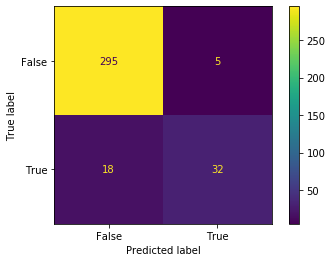

In [8]:
cf = confusion_matrix(raw_df['true_label_named'], raw_df['pred_label_named'])

cm_display = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=[False, True])

cm_display.plot()
plt.show()

In [9]:
TN = cf[0][0]
FN = cf[1][0]
FP = cf[0][1]
TP = cf[1][1]

2) Рассчитать показатели, основанные на таблице сопряженности: error rate, accuracy, sensitivity, specificity, precision, fall-out, F1-score, Cohen’s kappa.

In [10]:
metrics = {"status": "original"}

In [11]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
metrics['accuracy'] = [accuracy]

print(f"Accuracy = {round(accuracy, 2)}")

Accuracy = 0.93


In [12]:
error_rate = (FN + FP) / (TN + FN + FP + TP)
metrics['error_rate'] = [error_rate]

print(f"Error rate = {round(error_rate, 2)}")

Error rate = 0.07


In [13]:
sensitivity = TP / (TP + FN)
metrics['sensitivity'] = [sensitivity]

print(f"Sensitivity = {round(sensitivity, 2)}")

Sensitivity = 0.64


In [14]:
specificity = TN / (TN + FP)
metrics['specificity'] = [specificity]

print(f"Specificity = {round(specificity, 2)}")

Specificity = 0.98


In [15]:
precision = TP / (TP + FP)
metrics['precision'] = [precision]

print(f"Precision = {round(precision, 2)}")

Precision = 0.86


In [16]:
recall = TP / (TP + FN)
metrics['recall'] = [recall]

print(f"Recall = {round(recall, 2)}")

Recall = 0.64


In [17]:
fall_out = FP / (FP + TN)
metrics["fall_out"] = [fall_out]

print(f"Fall out = {round(fall_out, 2)}")

Fall out = 0.02


In [18]:
f1_score = 2 * (precision * recall) / (precision + recall)
metrics['f1_score'] = [f1_score]

print(f"F1 = {round(f1_score, 2)}")

F1 = 0.74


In [19]:
cohens_kappa = 2 * (TP * TN - FN * FP) / ((TP + FP) * (FP + TN) + (TP + FN) * (FN + TN))
metrics['cohens_kappa'] = [cohens_kappa]

print(f"Cohen’s kappa = {round(cohens_kappa, 2)}")

Cohen’s kappa = 0.7


In [20]:
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,status,accuracy,error_rate,sensitivity,specificity,precision,recall,fall_out,f1_score,cohens_kappa
0,original,0.934286,0.065714,0.64,0.983333,0.864865,0.64,0.016667,0.735632,0.699065


3) Построить график зависимости F().

In [21]:
f_betta = lambda x: (1 + x**2) * (precision * recall) / (x**2 * precision + recall)

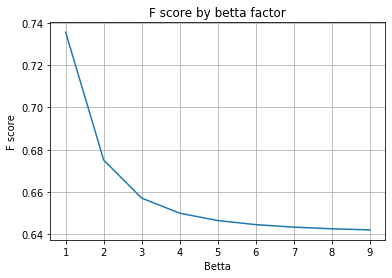

In [22]:
x = range(1, 10)
y = [f_betta(xi) for xi in x]

plt.title("F score by betta factor")

plt.plot(x, y)
plt.xlabel('Betta')
plt.ylabel('F score')
plt.grid()
plt.show()

Построить графики зависимости чувствительности и специфичности от объёма выборки.

In [23]:
cf.shape

(2, 2)

In [24]:
def dataset(size: int):
    tmp_df = raw_df.sample(size)
    cf = confusion_matrix(tmp_df["true_label_named"], tmp_df["pred_label_named"])
    if cf.shape == (1, 1):
        TN = 0
        FN = 0
        FP = cf[0][0]
        TP = 0
    elif cf.shape == (1, 2):
        TN = cf[0][1]
        FN = 0
        FP = cf[0][0]
        TP = 0
    else:
        TN = cf[0][0]
        FN = cf[1][0]
        FP = cf[0][1]
        TP = cf[1][1]
    return 0 if TP + FN == 0 else TP / (TP + FN), 0 if TN + FP == 0 else TN / (TN + FP)


def experiments(size: int):
    sens, spec = 0, 0
    for i in range(1000):
        tmp_sens, tmp_spec = dataset(size)
        sens += tmp_sens
        spec += tmp_spec
    return sens / 1000, spec / 1000


sensitivity, specificity = experiments(3)

In [25]:
%%time
x = range(1, 350, 10)
y = [experiments(xi) for xi in tqdm(x)]

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:48<00:00,  1.38s/it]

Wall time: 48.3 s


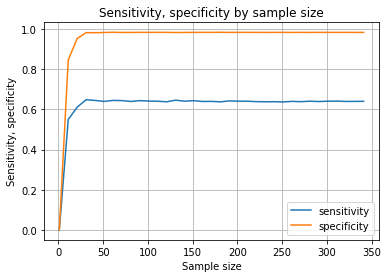

In [26]:
plt.title("Sensitivity, specificity by sample size")

plt.plot(x, [yi[0] for yi in y], label='sensitivity')
plt.plot(x, [yi[1] for yi in y], label='specificity')
plt.xlabel('Sample size')
plt.ylabel('Sensitivity, specificity')
plt.legend()
plt.grid()
plt.show()

5) Сравнить значения показателей, основанных на таблице сопряженности,  для случая, если положительные и отрицательные классы инвертированы (т.е. если все метки +1 заменить на -1, и все метки -1 – на +1).

In [27]:
raw_inversed_df = raw_df.copy()
raw_inversed_df["exp"] = raw_inversed_df["score"].apply(lambda x: 1 / (1 + np.exp(-x)))
raw_inversed_df["pred_label"] = raw_inversed_df["exp"].apply(
    lambda x: 1 if x >= 0.5 else -1
)
raw_inversed_df["true_label_named"] = raw_inversed_df["label"].apply(
    lambda x: {-1: "positive", 1: "negative"}[x]
)
raw_inversed_df["pred_label_named"] = raw_inversed_df["pred_label"].apply(
    lambda x: {-1: "positive", 1: "negative"}[x]
)

In [28]:
print(f"Data-size: {raw_df.shape[0]}")
print(f"Equal prediction: {raw_df[raw_df['true_label_named'] == raw_df['pred_label_named']].shape[0]}")
print(f"Non equal prediction: {raw_df[raw_df['true_label_named'] != raw_df['pred_label_named']].shape[0]}")

Data-size: 350
Equal prediction: 327
Non equal prediction: 23


In [29]:
cf = confusion_matrix(raw_inversed_df['true_label_named'], raw_inversed_df['pred_label_named'])

TN = cf[0][0]
FN = cf[1][0]
FP = cf[0][1]
TP = cf[1][1]

In [30]:
metrics = {"status": "inversed"}

In [31]:
accuracy = (TN + TP) / (TN + FN + FP + TP)
metrics['accuracy'] = [accuracy]

print(f"Accuracy = {round(accuracy, 2)}")

error_rate = (FN + FP) / (TN + FN + FP + TP)
metrics['error_rate'] = [error_rate]

print(f"Error rate = {round(error_rate, 2)}")

sensitivity = TP / (TP + FN)
metrics['sensitivity'] = [sensitivity]

print(f"Sensitivity = {round(sensitivity, 2)}")

specificity = TN / (TN + FP)
metrics['specificity'] = [specificity]

print(f"Specificity = {round(specificity, 2)}")

precision = TP / (TP + FP)
metrics['precision'] = [precision]

print(f"Precision = {round(precision, 2)}")

recall = TP / (TP + FN)
metrics['recall'] = [recall]

print(f"Recall = {round(recall, 2)}")

fall_out = FP / (FP + TN)
metrics["fall_out"] = [fall_out]

print(f"Fall out = {round(fall_out, 2)}")

f1_score = 2 * (precision * recall) / (precision + recall)
metrics['f1_score'] = [f1_score]

print(f"F1 = {round(f1_score, 2)}")

cohens_kappa = 2 * (TP * TN - FN * FP) / ((TP + FP) * (FP + TN) + (TP + FN) * (FN + TN))
metrics['cohens_kappa'] = [cohens_kappa]

print(f"Cohen’s kappa = {round(cohens_kappa, 2)}")

Accuracy = 0.93
Error rate = 0.07
Sensitivity = 0.98
Specificity = 0.64
Precision = 0.94
Recall = 0.98
Fall out = 0.36
F1 = 0.96
Cohen’s kappa = 0.7


In [32]:
metrics_df2 = pd.DataFrame.from_dict(metrics)
metrics_df = pd.concat([metrics_df, metrics_df2])
metrics_df

,status,accuracy,error_rate,sensitivity,specificity,precision,recall,fall_out,f1_score,cohens_kappa
0,original,0.934286,0.065714,0.640000,0.983333,0.864865,0.640000,0.016667,0.735632,0.699065
0,inversed,0.934286,0.065714,0.983333,0.640000,0.942492,0.983333,0.360000,0.962480,0.699065


6) Сделать выводы о качестве классификации на основе рассчитанных значений показателей.